In [1]:
library(bnlearn)

data(asia)
head(asia)

,A,S,T,L,B,E,X,D
1,no,yes,no,no,yes,no,no,yes
2,no,yes,no,no,no,no,no,no
3,no,no,yes,no,no,yes,yes,yes
4,no,no,no,no,yes,no,no,yes
5,no,no,no,no,no,no,no,yes
6,no,yes,no,no,no,no,no,yes


In [2]:
asia.net <- bn.fit(hc(asia, debug = F, 
                      whitelist = data.frame(from = c("A", "A", "B"), to = c("L", "T", "X"))), 
                   asia)
asia.net


  Bayesian network parameters

  Parameters of node A (multinomial distribution)

Conditional probability table:
     no    yes 
0.9916 0.0084 

  Parameters of node S (multinomial distribution)

Conditional probability table:
 
     L
S            no       yes
  no  0.5248394 0.1030303
  yes 0.4751606 0.8969697

  Parameters of node T (multinomial distribution)

Conditional probability table:
 
     A
T              no         yes
  no  0.991528842 0.952380952
  yes 0.008471158 0.047619048

  Parameters of node L (multinomial distribution)

Conditional probability table:
 
     A
L             no        yes
  no  0.93424768 0.90476190
  yes 0.06575232 0.09523810

  Parameters of node B (multinomial distribution)

Conditional probability table:
 
     S
B            no       yes
  no  0.7006036 0.2823062
  yes 0.2993964 0.7176938

  Parameters of node E (multinomial distribution)

Conditional probability table:
 
, , L = no

     T
E     no yes
  no   1   0
  yes  0   1

, , L = yes



In [3]:
cpquery(asia.net, (T=="yes"), TRUE, debug = T, n = 40000)
cpquery(asia.net, (L=="yes"), TRUE, n = 40000)
cpquery(asia.net, (B=="yes"), TRUE, n = 50000)

* checking which nodes are needed.
  > event involves the following nodes: T 
  > evidence involves the following nodes:  
  > upper closure is ' T A '
  > generating observations from 2 / 8 nodes.
* generated 10000 samples from the bayesian network.
  > evidence matches 10000 samples out of 10000 (p = 1).
  > event matches 92 samples out of 10000 (p = 0.0092).
* generated 10000 samples from the bayesian network.
  > evidence matches 10000 samples out of 10000 (p = 1).
  > event matches 93 samples out of 10000 (p = 0.0093).
* generated 10000 samples from the bayesian network.
  > evidence matches 10000 samples out of 10000 (p = 1).
  > event matches 98 samples out of 10000 (p = 0.0098).
* generated 10000 samples from the bayesian network.
  > evidence matches 10000 samples out of 10000 (p = 1).
  > event matches 90 samples out of 10000 (p = 0.009).
* generated a grand total of 40000 samples.
  > event matches 373 samples out of 40000 (p = 0.009325).


[1] 0.009325

[1] 0.067975

[1] 0.5092

In [4]:
cpquery(asia.net, (T=="yes"), (A=="yes" & S=="no"), n = 100000)
cpquery(asia.net, (L=="yes"), (A=="yes" & S=="no"), n = 100000, debug = T)
cpquery(asia.net, (B=="yes"), (A=="yes" & S=="no"), n = 100000)

[1] 0.03430079

* checking which nodes are needed.
  > event involves the following nodes: L 
  > evidence involves the following nodes: A S 
  > upper closure is ' S L A '
  > generating observations from 3 / 8 nodes.
* generated 10000 samples from the bayesian network.
  > evidence matches 43 samples out of 10000 (p = 0.0043).
  > event matches 1 samples out of 43 (p = 0.02325581).
* generated 10000 samples from the bayesian network.
  > evidence matches 41 samples out of 10000 (p = 0.0041).
  > event matches 0 samples out of 41 (p = 0).
* generated 10000 samples from the bayesian network.
  > evidence matches 36 samples out of 10000 (p = 0.0036).
  > event matches 0 samples out of 36 (p = 0).
* generated 10000 samples from the bayesian network.
  > evidence matches 43 samples out of 10000 (p = 0.0043).
  > event matches 0 samples out of 43 (p = 0).
* generated 10000 samples from the bayesian network.
  > evidence matches 35 samples out of 10000 (p = 0.0035).
  > event matches 1 samples out of 35 (p

[1] 0.01515152

[1] 0.3152174

Loading required package: graph

Attaching package: ‘graph’

The following objects are masked from ‘package:bnlearn’:

    degree, nodes, nodes<-

Loading required package: grid


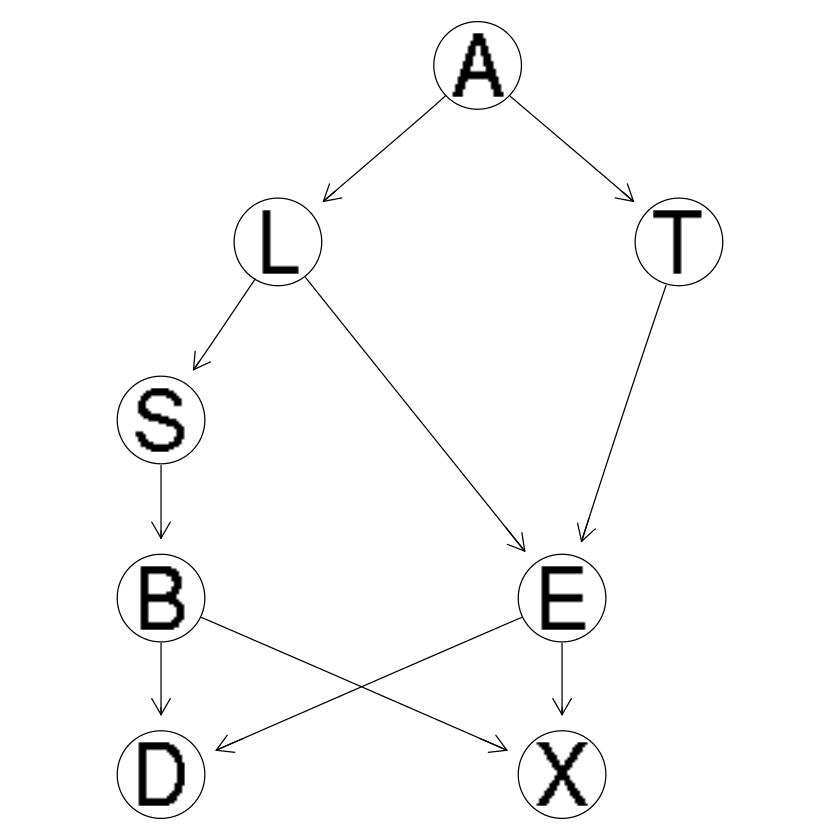

In [5]:
library(Rgraphviz)
graphviz.plot(asia.net)

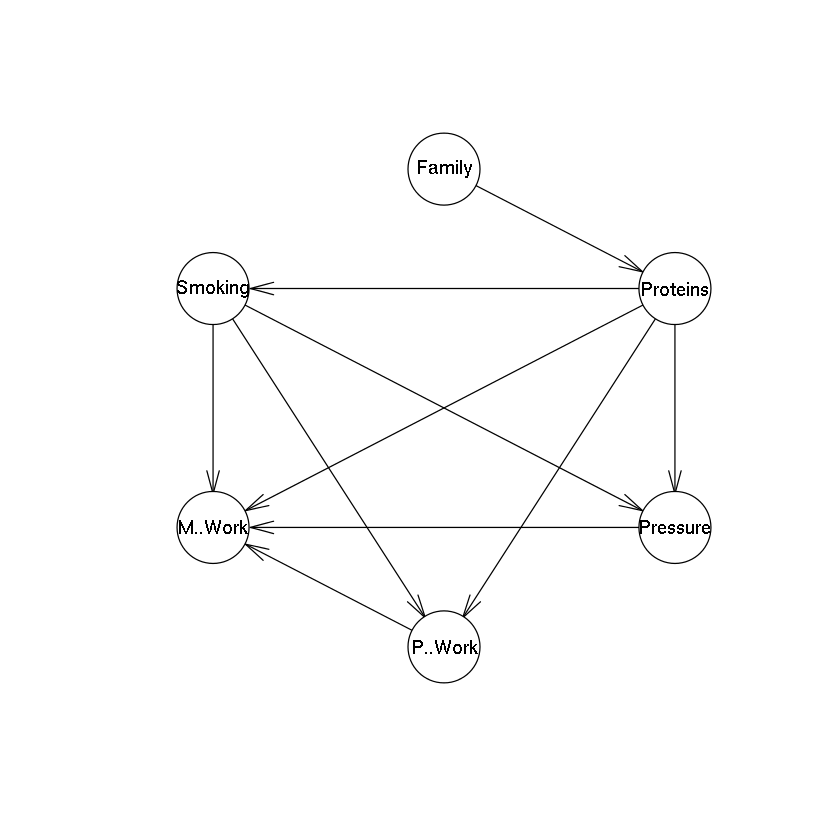

In [32]:
data(coronary)
bn_df <- data.frame(coronary)
res <- hc(bn_df, whitelist = data.frame(from = "Family", to = "Proteins"))
plot(res)

In [33]:
fittedbn <- bn.fit(res, data = bn_df)
fittedbn$Smoking


  Parameters of node Smoking (multinomial distribution)

Conditional probability table:
 
       Proteins
Smoking        <3        >3
    no  0.5636192 0.4653846
    yes 0.4363808 0.5346154

In [34]:
cpquery(fittedbn, event = (Proteins=="<3"), evidence = ( Smoking=="no"), debug = T )

* checking which nodes are needed.
  > event involves the following nodes: Proteins 
  > evidence involves the following nodes: Smoking 
  > upper closure is ' Smoking Proteins Family '
  > generating observations from 3 / 6 nodes.
* generated 5000 samples from the bayesian network.
  > evidence matches 2636 samples out of 5000 (p = 0.5272).
  > event matches 1634 samples out of 2636 (p = 0.6198786).


[1] 0.6198786

In [36]:
table(cpdist(fittedbn, nodes = "Proteins", evidence = (Smoking == "no"), n = 100000))

foo <- "no"
table(cpdist(fittedbn, nodes = "Proteins", evidence = (Smoking == foo), n = 100000))


   <3    >3 
32414 19578 


   <3    >3 
32589 19700 